In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [33]:
def exact_magnetization(beta):
    # exact formula of magnetization
    if beta>0.4408:
        mag=(1-(np.sinh(2*beta))**(-4))**(1/8)
    if beta<0.4408:
        mag=0
        
    return mag

In [113]:
def delta_energy(i,j,config):
    # compute the change in energy after flliping spin at site (i,j). Periodic boundary condition is applied.
    global L
    s_ij=config[i,j]
    neighbors=config[(i+1)%L,j]+config[i,(j+1)%L]+config[(i-1)%L,j]+config[i,(j-1)%L]
    del_E=2*s_ij*neighbors
    
    return del_E

## b

In [120]:
L=30
epochs=10000
beta=1.0
lattice=np.ones((L,L))
for epoch in range(epochs):
            # Randomly select a site on the lattice
    N, M = np.random.randint(0, L, 2)

            # Calculate energy of a flipped spin
    dE = delta_energy(N,M,lattice)

        # "Roll the dice" to see if the spin is flipped
    if dE <= 0.:
        lattice[N, M] *= -1
    elif np.exp(-dE*beta) > np.random.rand():
        lattice[N, M] *= -1

magnetization=np.mean(lattice)
print('beta=',beta)
print('exact result=',exact_magnetization(beta))
print('Monte Carlo result=',magnetization)

beta= 1.0
exact result= 0.9992757519570612
Monte Carlo result= 1.0


In [121]:
L=30
epochs=10000
beta=0.2
lattice=np.ones((L,L))
for epoch in range(epochs):
            # Randomly select a site on the lattice
    N, M = np.random.randint(0, L, 2)

            # Calculate energy of a flipped spin
    dE = delta_energy(N,M,lattice)

        # "Roll the dice" to see if the spin is flipped
    if dE <= 0.:
        lattice[N, M] *= -1
    elif np.exp(-dE*beta) > np.random.rand():
        lattice[N, M] *= -1

magnetization=np.mean(lattice)

print('beta=',beta)
print('exact result=',exact_magnetization(beta))
print('Monte Carlo result=',magnetization)

beta= 0.2
exact result= 0
Monte Carlo result= -0.013333333333333334


## c

In [123]:
## I set the threshold condition to be error of magnetization<0.08 or number of steps >=10^6
L=30
epochs=1000000
temp=np.array([0.2,0.3,0.4,0.41,0.42,0.43,0.435,0.438,0.439,0.441,0.442,0.45,0.47,0.5,0.6,0.7,
              0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0])
time_record=np.zeros(temp.shape[0])
mag_record=np.zeros(temp.shape[0])
for i in range(temp.shape[0]):
    beta=temp[i]
    print(beta)
    lattice=np.ones((L,L))
    exact_mag=exact_magnetization(beta)
    epoch=0
    while np.abs(np.mean(lattice)-exact_mag)>=0.08:
            # Randomly select a site on the lattice
        N, M = np.random.randint(0, L, 2)

            # Calculate energy of a flipped spin
        dE = delta_energy(N,M,lattice)

        # "Roll the dice" to see if the spin is flipped
        if dE <= 0.:
            lattice[N, M] *= -1
        elif np.exp(-dE*beta) > np.random.rand():
            lattice[N, M] *= -1
        
        if epoch>=1000000:
            break
        
        epoch+=1
    mag_record[i]=np.mean(lattice)
    time_record[i]=epoch
        
    

0.2
0.3
0.4
0.41
0.42
0.43
0.435
0.438
0.439
0.441
0.442
0.45
0.47
0.5
0.6
0.7
0.8
0.9
1.0
1.1
1.2
1.3
1.4
1.5
1.6
1.7
1.8
1.9
2.0


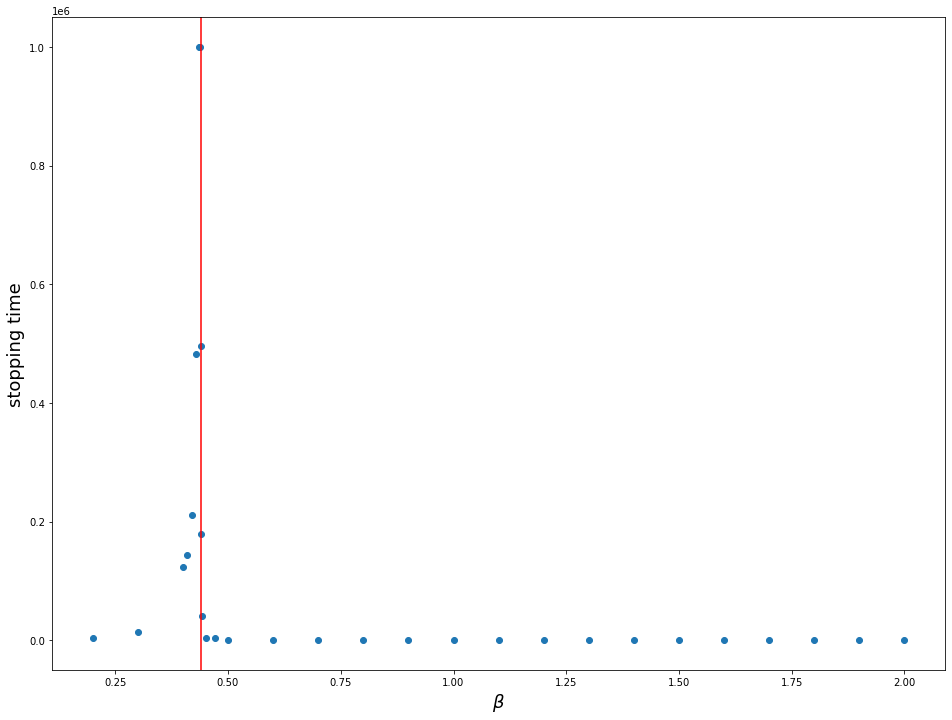

In [124]:
plt.figure(figsize=(16,12))
plt.xlabel(r'$\beta$',fontsize=18)
plt.ylabel('stopping time',fontsize=18)
plt.axvline(x=0.4408, color='r', linestyle='-')
plt.scatter(temp,time_record)

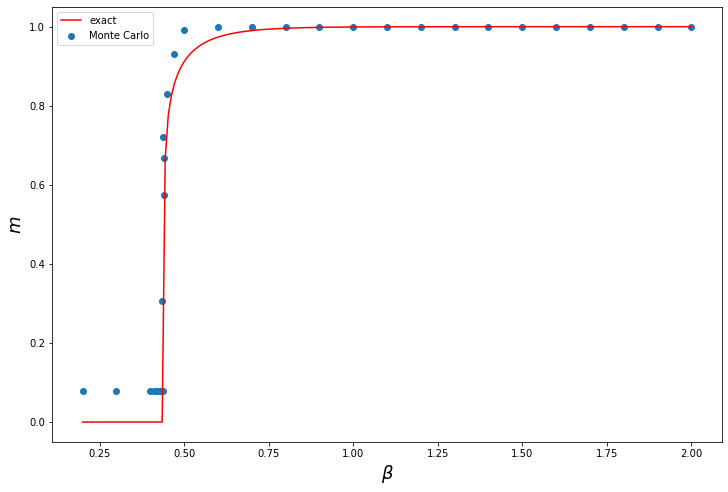

In [142]:
exact_result=np.zeros(x.shape[0])
for i in range(x.shape[0]):
    exact_result[i]=exact_magnetization(x[i])
plt.figure(figsize=(12,8))
plt.scatter(temp,mag_record,label='Monte Carlo')
x=np.linspace(0.2,2.0,200)
plt.plot(x,exact_result,color='r',label='exact')
plt.xlabel(r'$\beta$',fontsize=18)
plt.ylabel(r'$m$',fontsize=18)
plt.legend()